### This is Advance Practical Project_1

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.metrics import mean_absolute_error

### Import the dataset

In [2]:
df = pd.read_csv("train_data.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Let show the first five(5) columns of the dataset

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,5


## Let view how the histogram look like

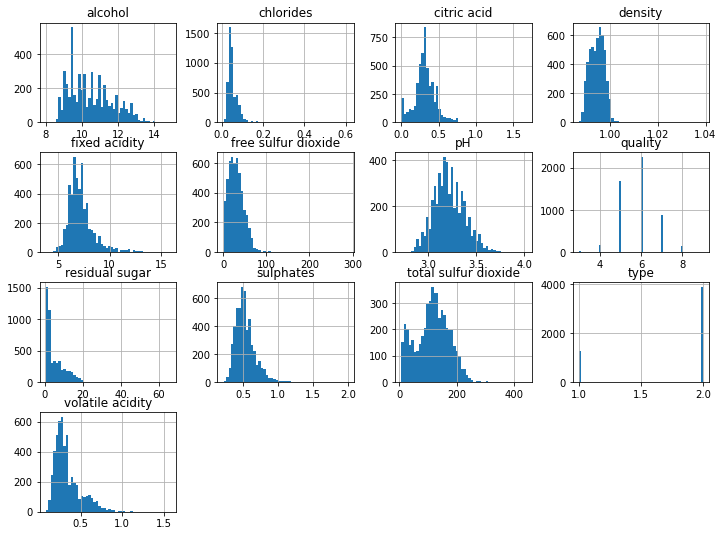

In [4]:
# fig=  df.hist(bins = 40, figsize = (9, 7))
# plt.show()
fig = df.hist(bins = 50, figsize = (12, 9))
plt.savefig('hist.pdf')
plt.show()

### Basic Insight into the dataset

In [5]:
df.shape

(5150, 13)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
type                      int64
quality                   int64
dtype: object

In [7]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type', 'quality'], dtype=object)

In [8]:
df.index.values

array([   0,    1,    2, ..., 5147, 5148, 5149], dtype=int64)

### Let see how the dataset is being displayed

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5150 non-null   float64
 1   volatile acidity      5150 non-null   float64
 2   citric acid           5150 non-null   float64
 3   residual sugar        5150 non-null   float64
 4   chlorides             5150 non-null   float64
 5   free sulfur dioxide   5150 non-null   float64
 6   total sulfur dioxide  5150 non-null   float64
 7   density               5150 non-null   float64
 8   pH                    5150 non-null   float64
 9   sulphates             5150 non-null   float64
 10  alcohol               5150 non-null   float64
 11  type                  5150 non-null   int64  
 12  quality               5150 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 523.2 KB


### Handling missing_data

In [10]:
missing_data = df.isnull()
missing_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,False,False,False,False,False,False,False,False,False,False,False,False,False
5146,False,False,False,False,False,False,False,False,False,False,False,False,False
5147,False,False,False,False,False,False,False,False,False,False,False,False,False
5148,False,False,False,False,False,False,False,False,False,False,False,False,False


### Let Check the missing_data per columns

In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

fixed acidity
False    5150
Name: fixed acidity, dtype: int64
 
volatile acidity
False    5150
Name: volatile acidity, dtype: int64
 
citric acid
False    5150
Name: citric acid, dtype: int64
 
residual sugar
False    5150
Name: residual sugar, dtype: int64
 
chlorides
False    5150
Name: chlorides, dtype: int64
 
free sulfur dioxide
False    5150
Name: free sulfur dioxide, dtype: int64
 
total sulfur dioxide
False    5150
Name: total sulfur dioxide, dtype: int64
 
density
False    5150
Name: density, dtype: int64
 
pH
False    5150
Name: pH, dtype: int64
 
sulphates
False    5150
Name: sulphates, dtype: int64
 
alcohol
False    5150
Name: alcohol, dtype: int64
 
type
False    5150
Name: type, dtype: int64
 
quality
False    5150
Name: quality, dtype: int64
 


### How many Missing_data do we have

In [12]:
missing_value_count = df.isnull().sum()
missing_value_count

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64

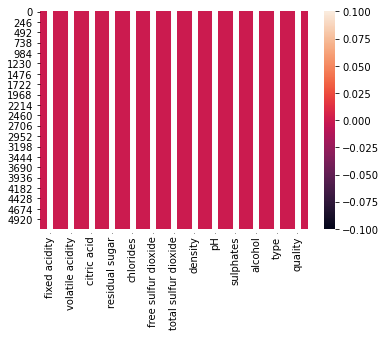

In [13]:
 sns.heatmap(df.isnull(), annot = True)

## Let's do some plotting to know how the data columns are distributed in the dataset

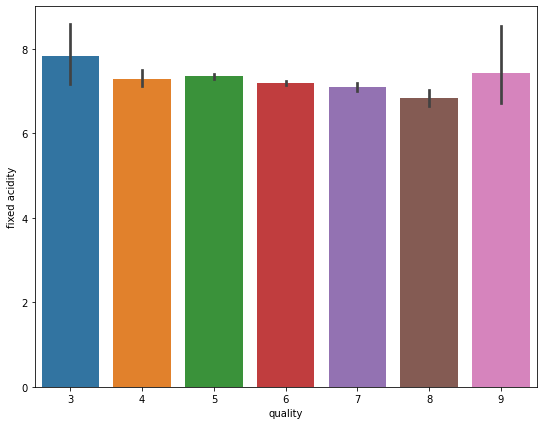

In [14]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (9, 7))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)
plt.savefig('fixed acidity.pdf')
plt.show()

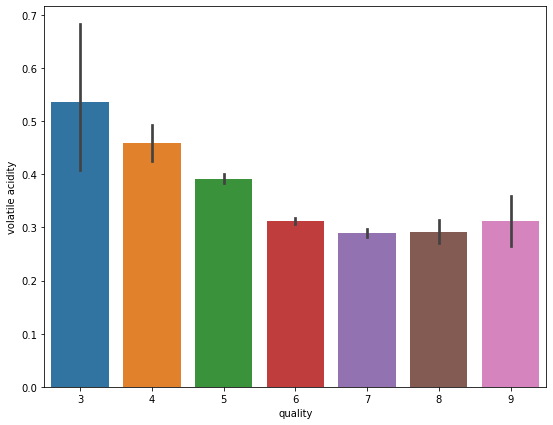

In [15]:
#Here we see that its somehow a downing trend in the volatile acidity as we  move higher the quality 
fig = plt.figure(figsize = (9, 7))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)
plt.savefig('volatile acidity.pdf')
plt.show()

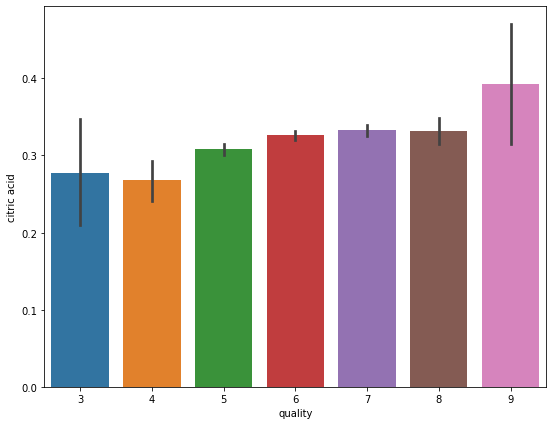

In [16]:
#Composition of citric acid go higher as we move higher in the quality of the wine
fig = plt.figure(figsize = (9, 7))
sns.barplot(x = 'quality', y = 'citric acid', data = df)
plt.savefig('quality vs citric acid.pdf')
plt.show()

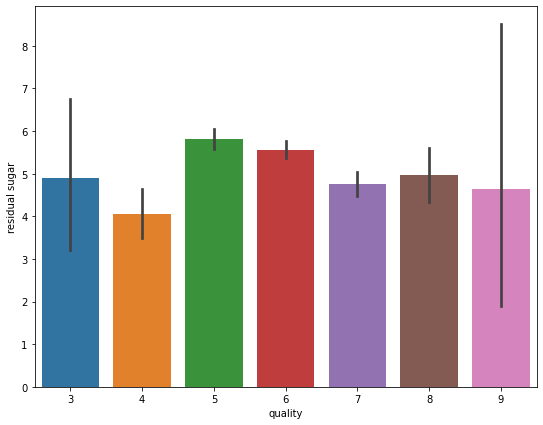

In [17]:
# W e can see how the residual sugar sometimes determine the quality of wine.
fig = plt.figure(figsize = (9, 7))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)
plt.savefig('residual sugar.pdf')
plt.show()

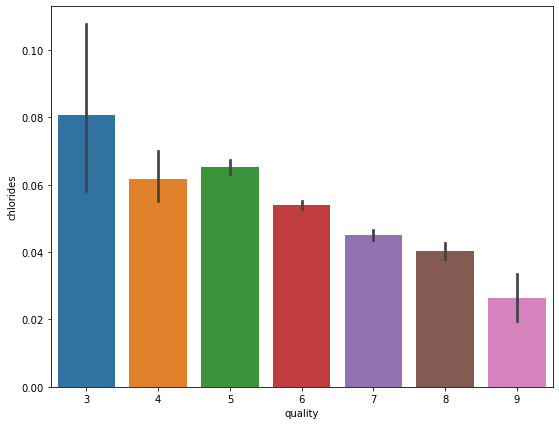

In [18]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (9, 7))
sns.barplot(x = 'quality', y = 'chlorides', data = df)
plt.savefig('chlorides.pdf')
plt.show()

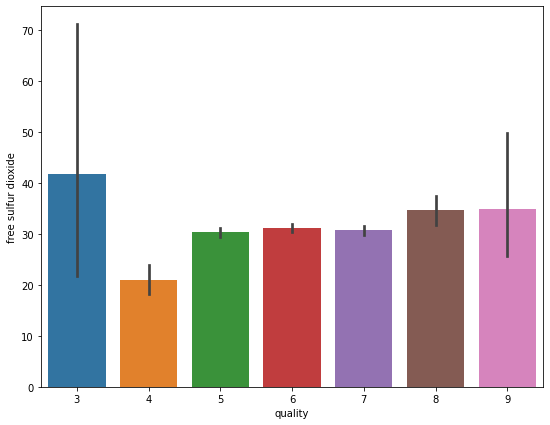

In [19]:
fig = plt.figure(figsize = (9, 7))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df);

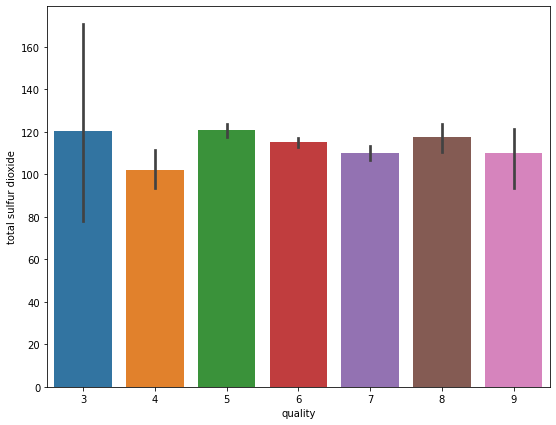

In [20]:

fig = plt.figure(figsize = (9, 7))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df);

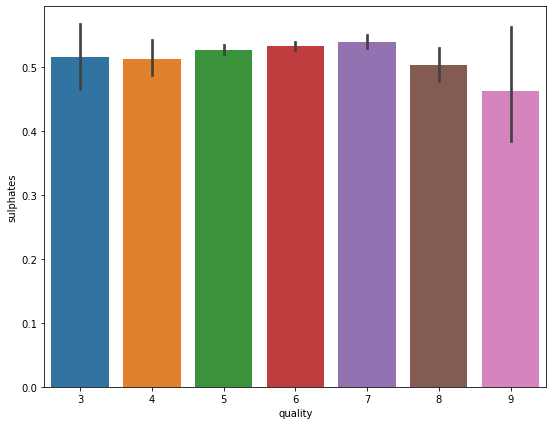

In [21]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (9, 7))
sns.barplot(x = 'quality', y = 'sulphates', data = df);

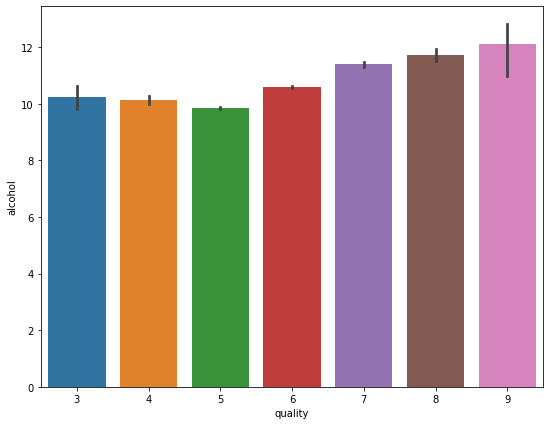

In [22]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (9 ,7))
sns.barplot(x = 'quality', y = 'alcohol', data = df);

### Descriptive Statistic

In [23]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.00000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,7.222786,0.339656,0.319272,5.437951,0.056106,30.634175,115.71466,0.994688,3.218117,0.531206,10.498667,1.753981,5.821359
std,1.297660,0.165322,0.145659,4.812319,0.035536,18.026858,56.80744,0.003037,0.160787,0.150149,1.195424,0.430732,0.875161
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,1.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.00000,0.992260,3.110000,0.430000,9.500000,2.000000,5.000000
50%,7.000000,0.290000,0.310000,2.900000,0.047000,29.000000,118.00000,0.994860,3.200000,0.510000,10.300000,2.000000,6.000000
75%,7.700000,0.410000,0.400000,8.100000,0.065000,42.000000,156.00000,0.996987,3.320000,0.600000,11.300000,2.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,2.000000,9.000000


### Correlation between the features of the data.

We can check how each features are reated with others using corr() function.

The correlation value ranges between -1 to 1.When it is close to 1, it means that there is a strong positive correlation. When

the coefficient is close to –1, it means that there is a strong negative correlation. Finally, coefficients close to zero mean

that there is no linear correlation. We can observe the detail information using correlation matrix

In [24]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
fixed acidity,1.000000,0.213023,0.326200,-0.107341,0.296670,-0.288494,-0.334279,0.454876,-0.258829,0.290292,-0.105378,-0.481108,-0.086983
volatile acidity,0.213023,1.000000,-0.376462,-0.191959,0.378049,-0.354008,-0.420756,0.267563,0.262455,0.222228,-0.040137,-0.651044,-0.272138
citric acid,0.326200,-0.376462,1.000000,0.149139,0.035947,0.127059,0.197818,0.095315,-0.334934,0.055909,-0.009106,0.193152,0.086064
residual sugar,-0.107341,-0.191959,0.149139,1.000000,-0.124010,0.397214,0.493276,0.564420,-0.260061,-0.175262,-0.363422,0.345339,-0.039953
chlorides,0.296670,0.378049,0.035947,-0.124010,1.000000,-0.205883,-0.286435,0.362038,0.044950,0.407790,-0.259345,-0.515705,-0.211849
free sulfur dioxide,-0.288494,-0.354008,0.127059,0.397214,-0.205883,1.000000,0.720423,0.021315,-0.138249,-0.184645,-0.171227,0.471828,0.054349
total sulfur dioxide,-0.334279,-0.420756,0.197818,0.493276,-0.286435,0.720423,1.000000,0.030169,-0.230193,-0.266360,-0.253376,0.703093,-0.033176
density,0.454876,0.267563,0.095315,0.564420,0.362038,0.021315,0.030169,1.000000,0.011441,0.260882,-0.691351,-0.385031,-0.315940
pH,-0.258829,0.262455,-0.334934,-0.260061,0.044950,-0.138249,-0.230193,0.011441,1.000000,0.177261,0.116954,-0.327108,0.019526
sulphates,0.290292,0.222228,0.055909,-0.175262,0.407790,-0.184645,-0.266360,0.260882,0.177261,1.000000,-0.019219,-0.480989,0.018163


### Let visualize how the dataset correlated

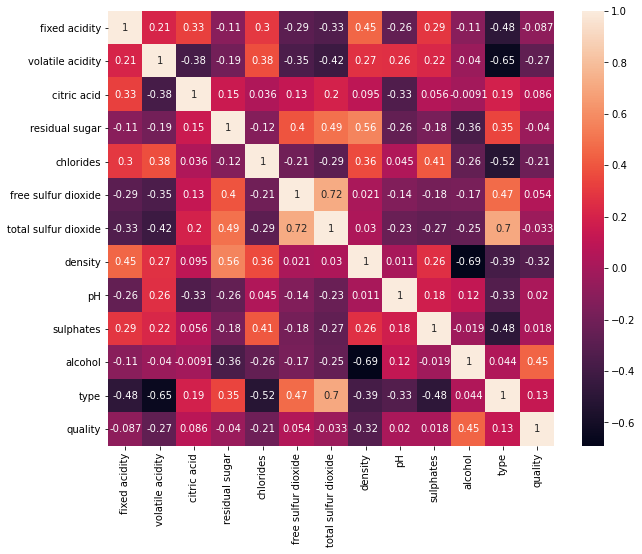

In [25]:
fig = plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.savefig('correlation.pdf')
plt.show()

### Let check the number and range of quality wines

In [26]:
df['quality'].head()

0    5
1    5
2    6
3    5
4    5
Name: quality, dtype: int64

In [27]:
df['quality'].value_counts()

6    2248
5    1678
7     872
4     173
8     149
3      26
9       4
Name: quality, dtype: int64

In [28]:
bins=[0,5,7,10]
labels=[0,1,2]
df['wine_quality']=pd.cut(df['quality'],bins=bins,labels=labels)

In [29]:
Counter(df["wine_quality"])

Counter({0: 1877, 1: 3120, 2: 153})

In [30]:
Counter(df['quality'])

Counter({5: 1678, 6: 2248, 7: 872, 4: 173, 8: 149, 3: 26, 9: 4})

### Graphical Relation between the data variables.

We can visualize scatterplot matrix for the better understanding relationship between a pair of variables. It plots every numerical attribute against every other. 'pairplot' of seaborn helps to achieve this

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

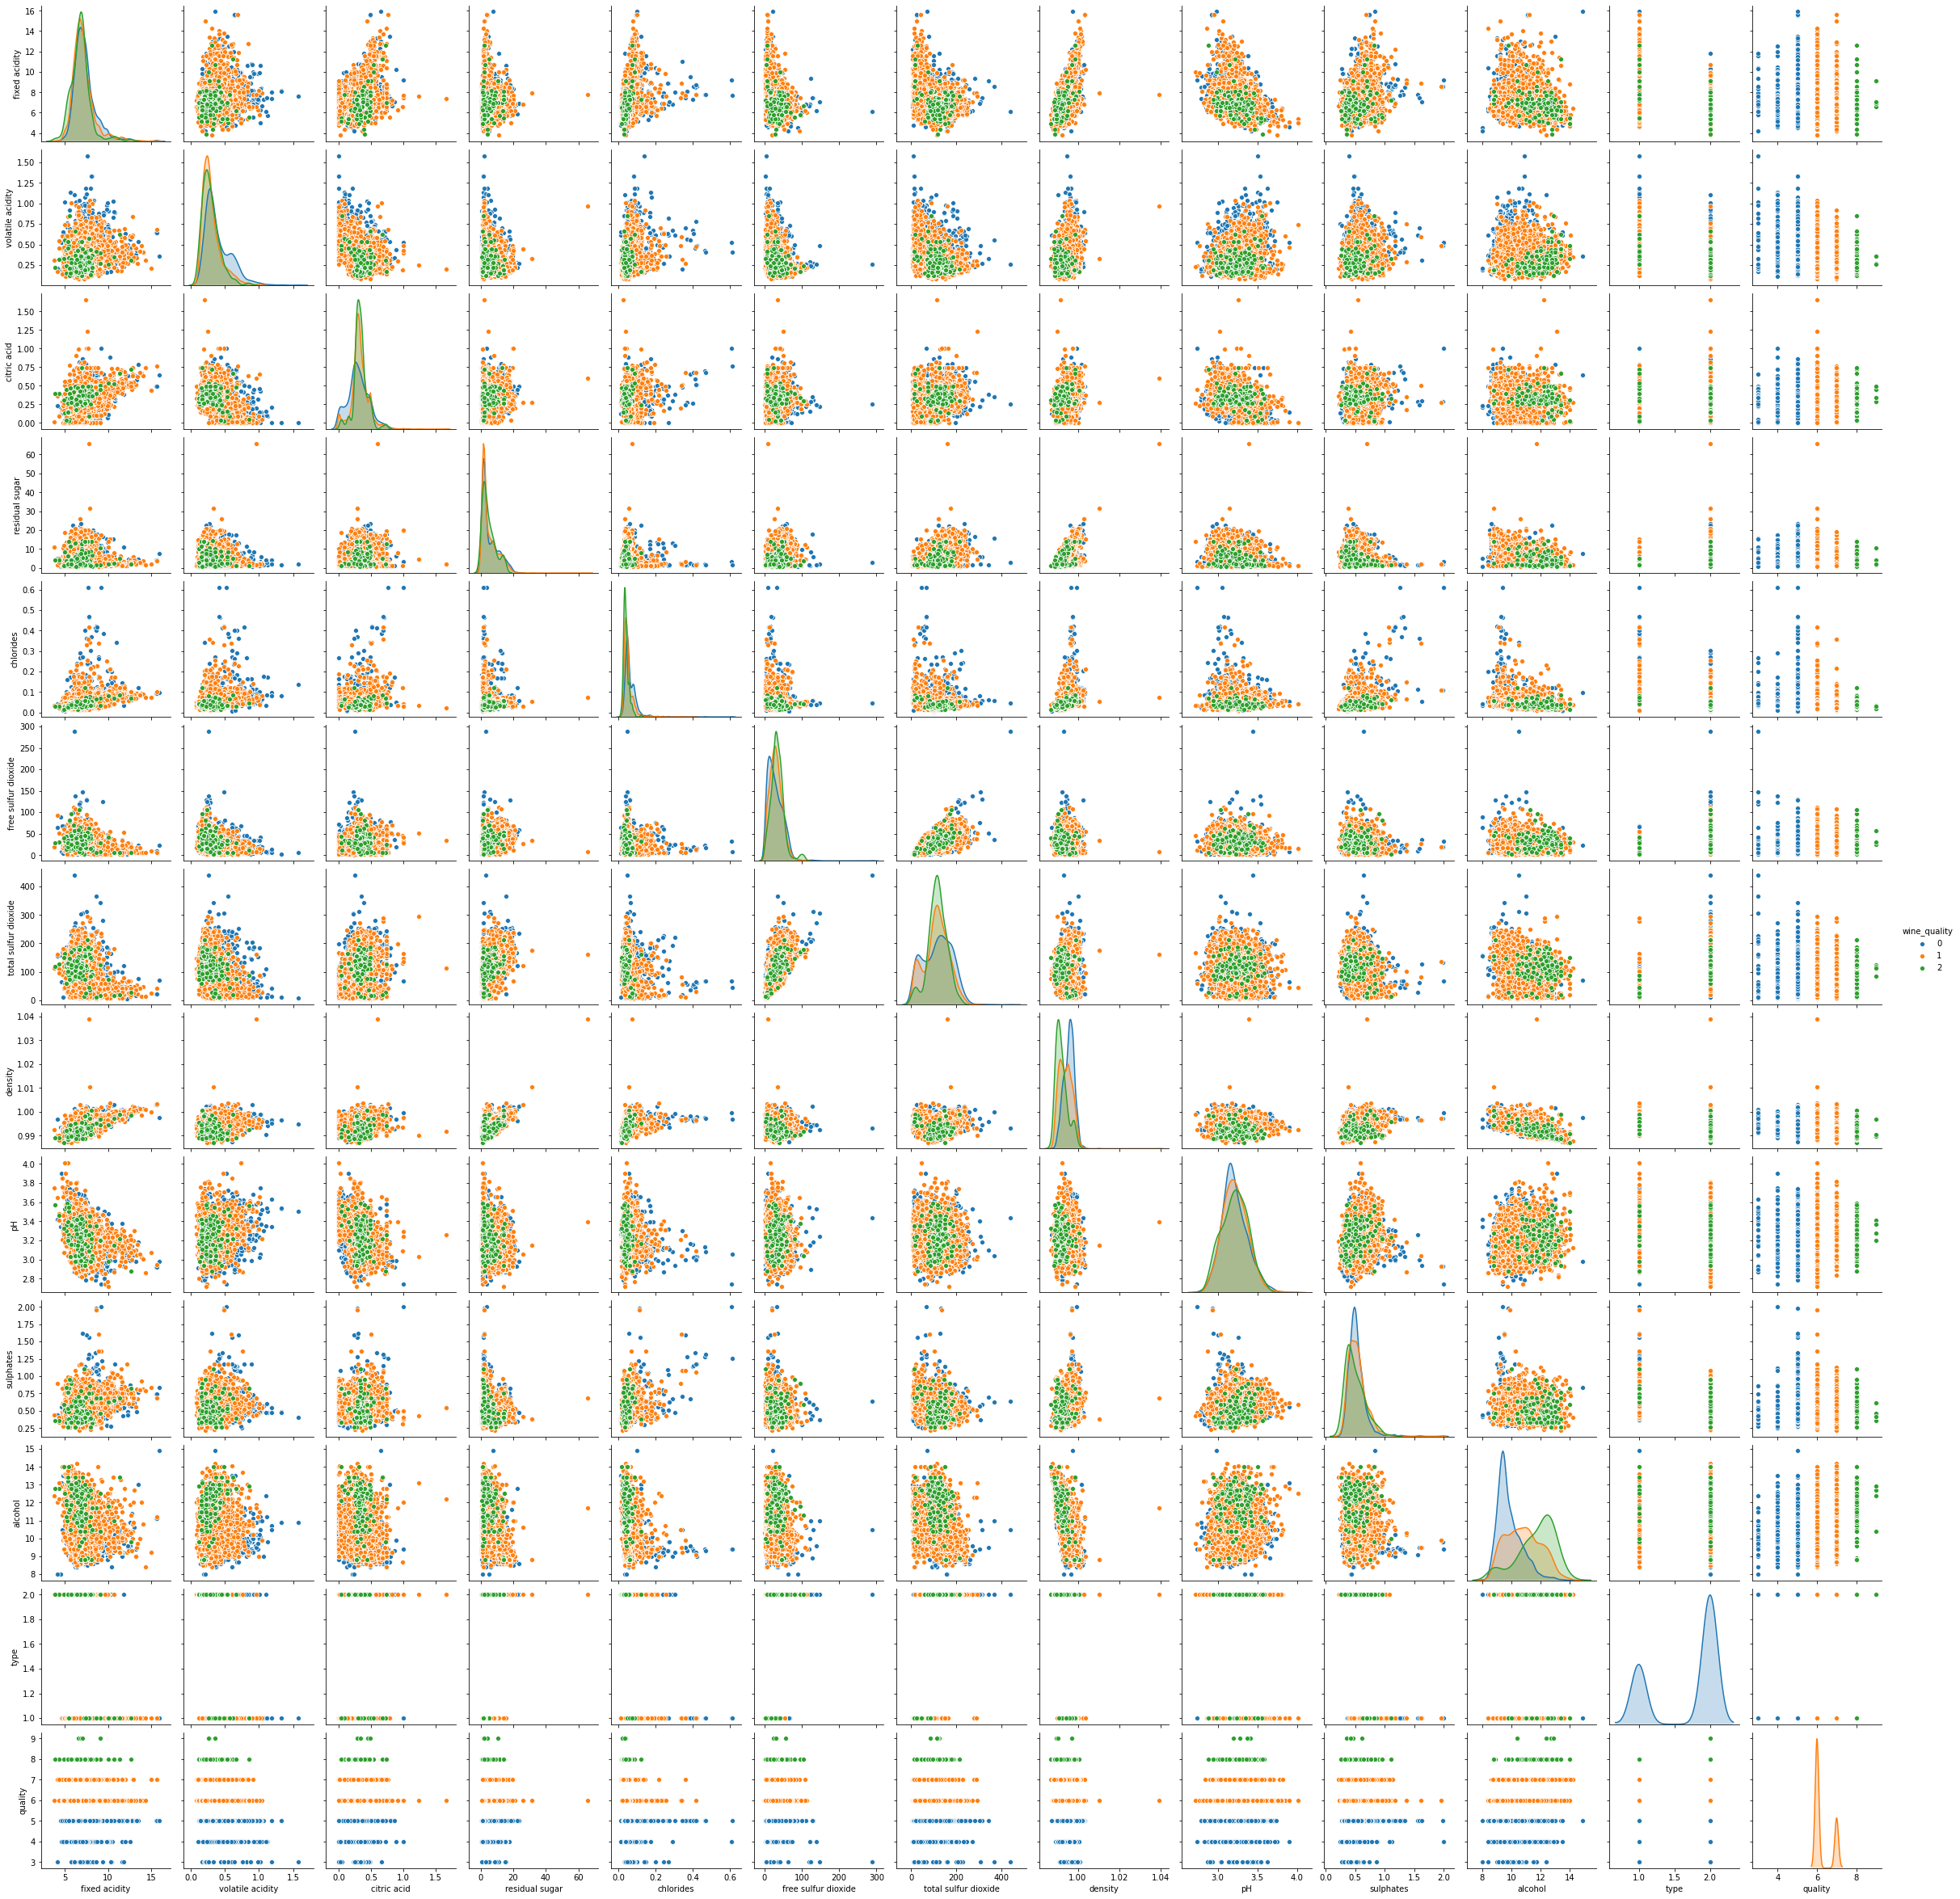

In [31]:
fig = plt.figure(figsize = (10, 8))
sns.pairplot(df,hue='wine_quality')
plt.savefig('Win-quality.pdf')
plt.show()

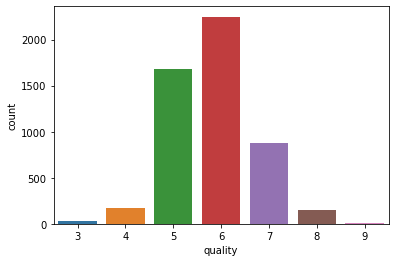

In [32]:
sns.countplot(x="quality",data=df)
plt.show()

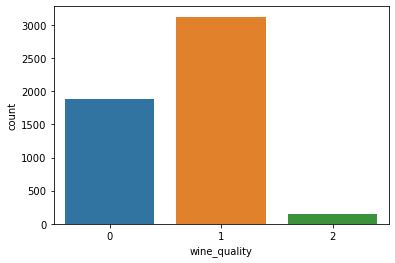

In [33]:
sns.countplot(x="wine_quality",data= df);

### Preprocessing the Data for Machine Learning Algorithm



### Splitting the dataset into the Training set and Test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [35]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

### Applying PCA

In [36]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

### Train the data on ExtraTreesClassifier

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=120, random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=120, random_state=0)

## Making the Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  0   0   1   6   0   0]
 [  0   3  24   6   1   0]
 [  0   1 239 110   3   0]
 [  0   2  67 344  28   1]
 [  0   0   4  70  92   0]
 [  0   0   0   8   6  14]]


0.6718446601941748

In [39]:
kaggle_test_set = pd.read_csv("test_data.csv")

In [40]:
kaggle_test_set

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
1,2,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,1
2,3,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,1
3,4,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,1
4,5,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,1343,5.7,0.400,0.35,5.1,0.026,17.0,113.0,0.99052,3.18,0.67,12.4,2
1343,1344,5.8,0.385,0.25,3.7,0.031,38.0,122.0,0.99128,3.20,0.63,11.2,2
1344,1345,7.0,0.360,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,2
1345,1346,6.4,0.330,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.6,2


In [41]:
id_test_kaggle = kaggle_test_set['id'].values

In [42]:
id_test_kaggle

array([   1,    2,    3, ..., 1345, 1346, 1347], dtype=int64)

In [43]:
# drop the column id for this another dataset
kaggle_data =  kaggle_test_set.drop(["id"], axis =1)

In [44]:
kaggle_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
1,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,1
2,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,1
3,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,1
4,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1342,5.7,0.400,0.35,5.1,0.026,17.0,113.0,0.99052,3.18,0.67,12.4,2
1343,5.8,0.385,0.25,3.7,0.031,38.0,122.0,0.99128,3.20,0.63,11.2,2
1344,7.0,0.360,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,2
1345,6.4,0.330,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.6,2


### New prediction

In [45]:
y_kaggle_predition = clf.predict(kaggle_data)

In [46]:
y_kaggle_predition

array([6, 5, 5, ..., 6, 5, 5], dtype=int64)

In [47]:
np.shape(y_kaggle_predition)

(1347,)

### Let create a dictionary for both y_kaggle_predition and id_test_kaggle

In [48]:
dict = {'id':id_test_kaggle, 'prediction':y_kaggle_predition}

In [49]:
dict 

{'id': array([   1,    2,    3, ..., 1345, 1346, 1347], dtype=int64),
 'prediction': array([6, 5, 5, ..., 6, 5, 5], dtype=int64)}

In [50]:
My_Prediction = pd.DataFrame(dict )

In [51]:
My_Prediction

,id,prediction
0,1,6
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
1342,1343,6
1343,1344,7
1344,1345,6
1345,1346,5


In [52]:
My_Prediction.to_csv('My_Prediction.csv', index = False)